# Gaussian Location Model

Notebook for the estimation of the model parameters

### Mount Drive

In [ ]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


The following path has to be adjusted if necessary:

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"

     |████████████████████████████████| 368kB 3.4MB/s 
     |████████████████████████████████| 430kB 3.2MB/s 


### Imports

In [ ]:
! pip install qmcpy --quiet

     |████████████████████████████████| 368kB 4.5MB/s 


In [ ]:
import numpy as np
import qmcpy

### Optimisation

In [ ]:
np.random.seed(11)

Set parameters:

In [ ]:
m = 2**11                # number of true data points
n = 2**9                 # number of simulated data points
theta_star = np.ones(2)  # true parameter
d = len(theta_star)      # data dimension
p = d                    # parameter dimension
s = 2                    # standard deviation of the model
l = -1                   # l=-1 for median heuristic
method_gd = 'SGD'        # SGD or NSGD
eta = 0.1               # step size
max_it = 10000           # number of descent steps
start = np.zeros(d)      # start values

Define QMC sequence:

In [ ]:
qmc = qmcpy.Halton(d)
qmc_1 = qmcpy.Halton(d+1) # for odd numbers of parameters

Sample from the Gaussian location model:

In [ ]:
y = sample_gaussian('MC',m,d,s,theta_star)

Gradient descent:

In [ ]:
theta_mc,loss_mc = optim('gaussian','MC',method_gd,eta,max_it,l,n,m,d,p,y,start,s)

iteration: 1000 
loss:      0.0010754 
estimate:  [0.908 0.995] 
gradient:  [-0.009 -0.005]
iteration: 2000 
loss:      -0.0001224 
estimate:  [0.915 1.002] 
gradient:  [-0. -0.]
iteration: 3000 
loss:      -0.0002185 
estimate:  [0.922 1.004] 
gradient:  [0.004 0.005]
iteration: 4000 
loss:      0.0002876 
estimate:  [0.914 0.997] 
gradient:  [0.005 0.005]
iteration: 5000 
loss:      -0.0003925 
estimate:  [0.911 0.994] 
gradient:  [ 0.001 -0.004]
iteration: 6000 
loss:      0.0012315 
estimate:  [0.926 0.998] 
gradient:  [0.016 0.003]
iteration: 7000 
loss:      -0.0003931 
estimate:  [0.92  1.005] 
gradient:  [-0.002  0.005]
iteration: 8000 
loss:      0.0001209 
estimate:  [0.919 0.996] 
gradient:  [-0.008  0.008]
iteration: 9000 
loss:      0.0020259 
estimate:  [0.929 0.996] 
gradient:  [-0.002 -0.018]
iteration: 10000 
loss:      -0.0007108 
estimate:  [0.905 1.006] 
gradient:  [0.008 0.002]
-------------------------------------------
final loss:        -0.0007108 
final estimat

In [ ]:
theta_qmc,loss_qmc = optim('gaussian','QMC',method_gd,eta,max_it,l,n,m,d,p,y,start,s)

iteration: 1000 
loss:      -0.0013326 
estimate:  [0.927 0.991] 
gradient:  [-0. -0.]
iteration: 2000 
loss:      -0.0013329 
estimate:  [0.928 0.993] 
gradient:  [-2.525e-07 -2.709e-07]
iteration: 3000 
loss:      -0.0013329 
estimate:  [0.928 0.993] 
gradient:  [-4.168e-10 -5.419e-10]
iteration: 4000 
loss:      -0.0013329 
estimate:  [0.928 0.993] 
gradient:  [-1.544e-11 -1.781e-12]
iteration: 5000 
loss:      -0.0013329 
estimate:  [0.928 0.993] 
gradient:  [-1.510e-11  1.724e-13]
iteration: 6000 
loss:      -0.0013329 
estimate:  [0.928 0.993] 
gradient:  [-1.510e-11  1.724e-13]
iteration: 7000 
loss:      -0.0013329 
estimate:  [0.928 0.993] 
gradient:  [ 9.271e-12 -6.547e-12]
iteration: 8000 
loss:      -0.0013329 
estimate:  [0.928 0.993] 
gradient:  [ 9.271e-12 -6.547e-12]
iteration: 9000 
loss:      -0.0013329 
estimate:  [0.928 0.993] 
gradient:  [7.267e-12 1.882e-11]
iteration: 10000 
loss:      -0.0013329 
estimate:  [0.928 0.993] 
gradient:  [-1.711e-11  2.554e-11]
-----

In [ ]:
theta_rqmc,loss_rqmc = optim('gaussian','RQMC',method_gd,eta,max_it,l,n,m,d,p,y,start,s)

iteration: 1000 
loss:      -0.0013064 
estimate:  [0.918 0.998] 
gradient:  [ 0.    -0.001]
iteration: 2000 
loss:      -0.0013284 
estimate:  [0.919 1.   ] 
gradient:  [-1.808e-04 -2.130e-05]
iteration: 3000 
loss:      -0.0013727 
estimate:  [0.919 1.   ] 
gradient:  [ 1.925e-05 -1.788e-04]
iteration: 4000 
loss:      -0.0013539 
estimate:  [0.919 1.   ] 
gradient:  [ 0. -0.]
iteration: 5000 
loss:      -0.0013703 
estimate:  [0.92 1.  ] 
gradient:  [-0.001 -0.   ]
iteration: 6000 
loss:      -0.0013175 
estimate:  [0.919 1.001] 
gradient:  [ 0. -0.]
iteration: 7000 
loss:      -0.0012954 
estimate:  [0.919 1.001] 
gradient:  [3.157e-05 9.791e-04]
iteration: 8000 
loss:      -0.001334 
estimate:  [0.919 1.   ] 
gradient:  [-0.001 -0.   ]
iteration: 9000 
loss:      -0.0013555 
estimate:  [0.92 1.  ] 
gradient:  [ 6.504e-05 -8.097e-05]
iteration: 10000 
loss:      -0.0013221 
estimate:  [0.92 1.  ] 
gradient:  [ 0. -0.]
-------------------------------------------
final loss:        -

### Visualise results

In [ ]:
it = 10000

Plot the loss:

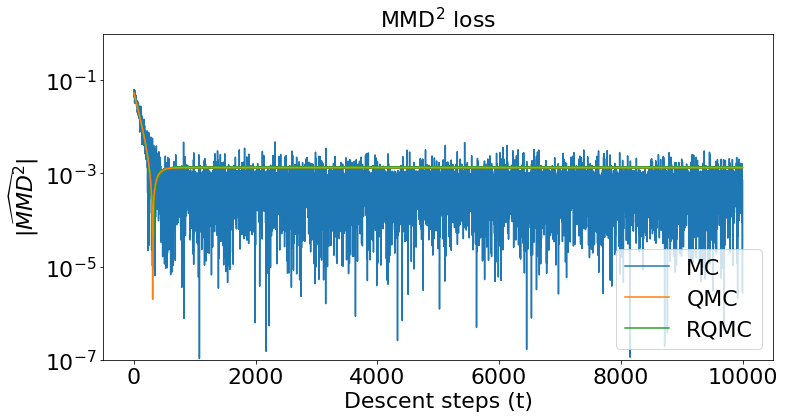

In [ ]:
plot_loss(it,d,(12,6),loss_mc,loss_qmc,loss_rqmc,'MC','QMC','RQMC')

Plot the estimates:

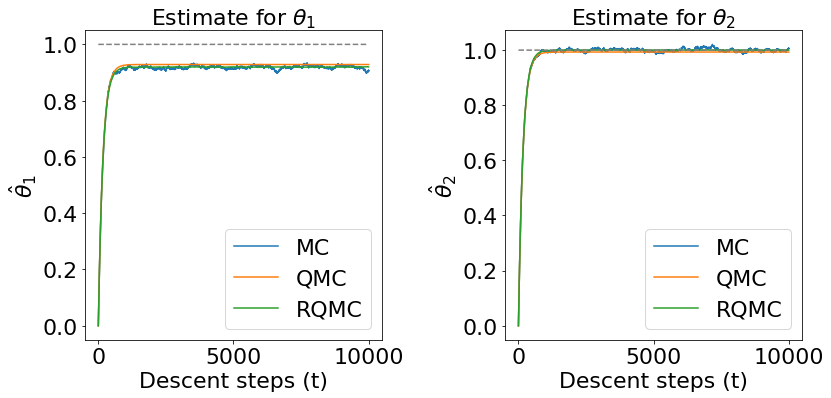

In [ ]:
plot_estimates(2,p,d,(12,((d//2)+(d%2))*6),max_it,theta_mc,theta_qmc,theta_rqmc,theta_star,'MC','QMC','RQMC')

Plot the MSE:

In [ ]:
mse_mc,mse_qmc,mse_rqmc = mse(max_it,p,theta_mc,theta_qmc,theta_rqmc,theta_star)

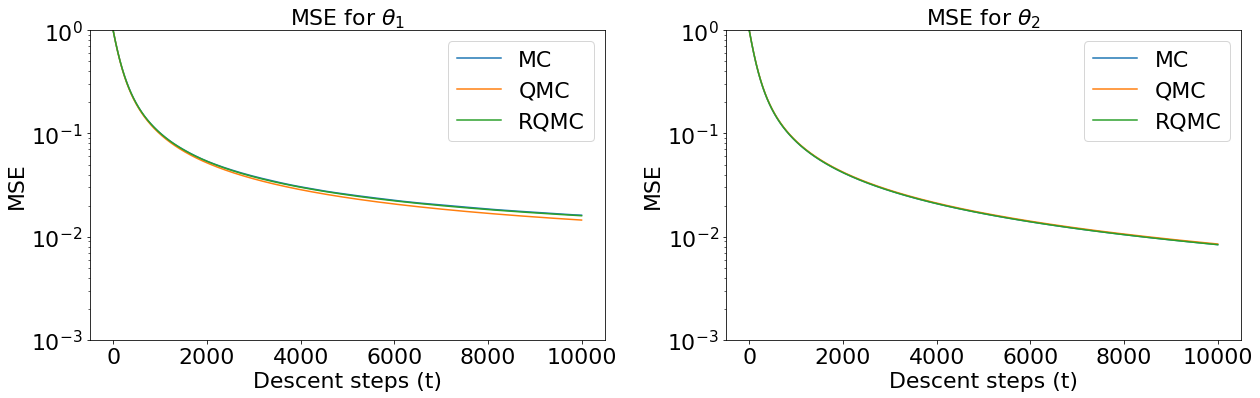

In [ ]:
plot_mse(2,p,d,(18,((d//2)+(d%2))*6),max_it,mse_mc,mse_qmc,mse_rqmc,'MC','QMC','RQMC','gaussian')